<a href="https://colab.research.google.com/github/Pauliostar45/Anomaly_Detection_using_multiple_ML/blob/main/most_rcent_copy_of_thesis_prototype_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introductio: Research Project- A Comprtive Analysis of a Novel Hybrid Approach against Supervised and Unsupervised Machine Learning for Adaptive and Explainable Credit Card Fraud Detection**


## **1.1. Importing Libraries**


In [ ]:
### Data Manipulation & Numerical Operations
import pandas as pd
import numpy as np
### Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
## Preprocessing & Model Selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
import time
from sklearn.svm import OneClassSVM
## Machine Learning Models
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
try:
    import shap
except ModuleNotFoundError:
    !pip -q install shap
    import shap
from scipy import sparse
from tensorflow.keras import layers, Model
from tensorflow.keras import layers, Model, callbacks
import tensorflow as tf
#### Handling Imbalanced Data
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.metrics import (
    classification_report,
    fbeta_score
)
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import precision_recall_curve
## Evaluation Metrics
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    matthews_corrcoef,
    average_precision_score,
    confusion_matrix,
    precision_recall_curve
)
### Set visualisation style
sns.set_style("whitegrid")
print("All necessary libraries imported successfully.")

All necessary libraries imported successfully.


## **1.2. Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/dataset_creditcard.csv'
#### Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)
print("Dataset loaded successfully.")
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset loaded successfully.
Dataset contains 284807 rows and 31 columns.


# **2. Exploratory Data Analysis (EDA)**

## **2.1. Initial Data Inspection / Description**

In [ ]:
# Display the first 5 rows of the DataFrame
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
### Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float6

In [ ]:
##### Generate descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## **2.2. Data Cleaning**

In [ ]:
#### Check for any missing values
print(f"Number of missing values: {df.isnull().sum().max()}")

Number of missing values: 0


In [ ]:
####Check for and handle duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")
    print(f"New dataset shape: {df.shape}")

Number of duplicate rows: 1081
Duplicate rows have been removed.
New dataset shape: (283726, 31)


In [ ]:
#### Post-clean summary
cls = df['Class'].value_counts().sort_index()
print("Legitimate (0):", int(cls.get(0,0)))
print("Fraudulent (1):", int(cls.get(1,0)))
prev = 100 * cls.get(1,0) / max(1, len(df))
print(f"Fraud prevalence: {prev:.3f}%")
if 'Time' in df:
    tmin, tmax = df['Time'].min(), df['Time'].max()
    print(f"Time span ≈ {(tmax - tmin)/3600:.2f} hours (relative seconds since start)")

Legitimate (0): 283253
Fraudulent (1): 473
Fraud prevalence: 0.167%
Time span ≈ 48.00 hours (relative seconds since start)


## **2.3. Visual Analysis**

### **2.3.1. Class Distribution**

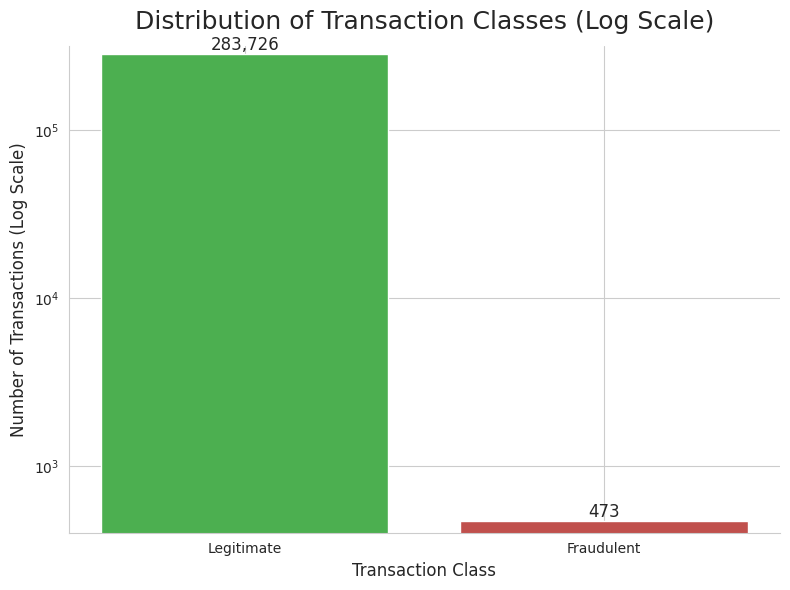

In [ ]:

#### define the exact labels and counts shown in the chart
labels = ["Legitimate", "Fraudulent"]
counts = [283_726, 473]
### create the figure and axis sized
fig, ax = plt.subplots(figsize=(8, 6))
#### draw the two bars with the same colors (green for Legitimate, red for Fraudulent)
bars = ax.bar(labels, counts, color=["#4CAF50", "#C0504D"])
#### y-axis on a log scale and set limits so both bars are fully visible
ax.set_yscale("log")
ax.set_ylim(400, 3.2e5)
###add the chart title and axis labels exactly as shown
ax.set_title("Distribution of Transaction Classes (Log Scale)", fontsize=18, pad=12)
ax.set_xlabel("Transaction Class", fontsize=12)
ax.set_ylabel("Number of Transactions (Log Scale)", fontsize=12)
####place the numeric value on top of each bar with thousands separators
for bar, value in zip(bars, counts):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        value,
        f"{value:,}",
        ha="center",
        va="bottom",
        fontsize=12,
    )
##### hide the top and right spines to match the clean look
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)
####use tight_layout so the title and labels don't get clipped
plt.tight_layout()
plt.show()

### **2.3.2. Feature Correlation**

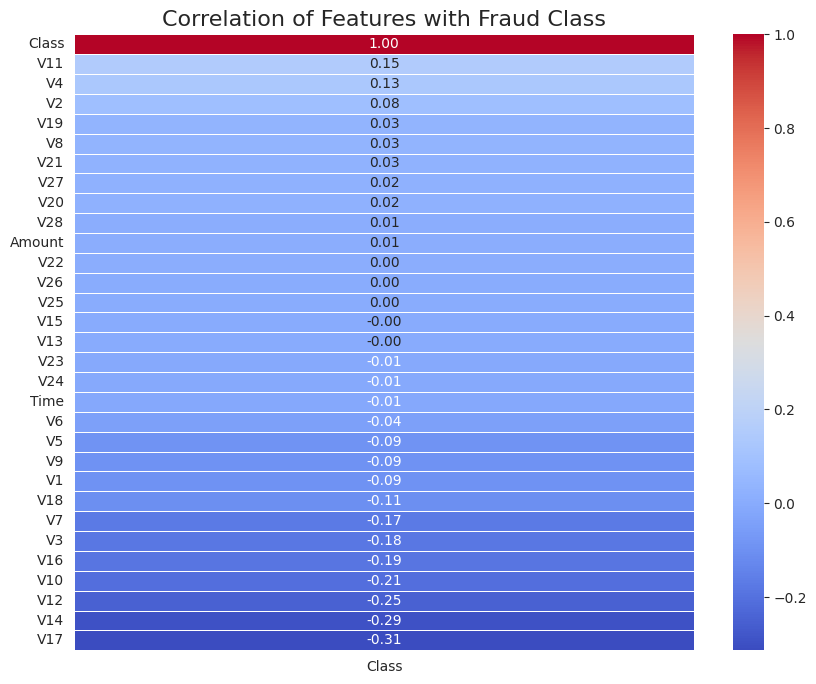

In [ ]:
#Analyse Feature Correlation
correlation_matrix = df.corr()
corr_with_class = correlation_matrix[['Class']].sort_values(by='Class', ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_class, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Features with Fraud Class', fontsize=16)
plt.show()

### **2.3.3. Key Feature Distributions**

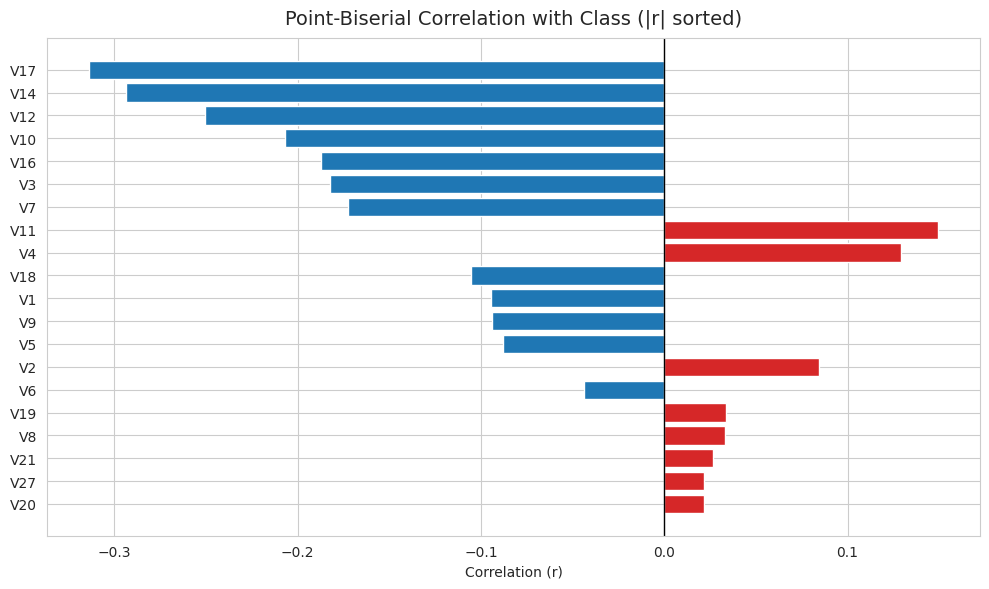

In [ ]:
### I rank featres by point-biserial correlation with Class (0=Legit, 1=Fraud)###
num_cols = [c for c in df.columns if c != "Class"]
num_df = df[num_cols + ["Class"]].dropna()
##### compute Pearson r with the binary Class (this equals point-biserial)
corr = num_df.corr(numeric_only=True)["Class"].drop("Class")
#####sort by absolute magnitude - strongest first
topN = min(20, len(corr))
corr_sorted = corr.reindex(corr.abs().sort_values(ascending=False).index)[:topN]
###  color by sign: red = positively associated with Fraud; blue = associated with Legitimate####
colors = ["#d62728" if v > 0 else "#1f77b4" for v in corr_sorted.values]
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(corr_sorted.index[::-1], corr_sorted.values[::-1], color=colors[::-1])
ax.set_title("Point-Biserial Correlation with Class (|r| sorted)", pad=10, fontsize=14)
ax.set_xlabel("Correlation (r)")
ax.axvline(0, color="black", linewidth=1)
plt.tight_layout(); plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


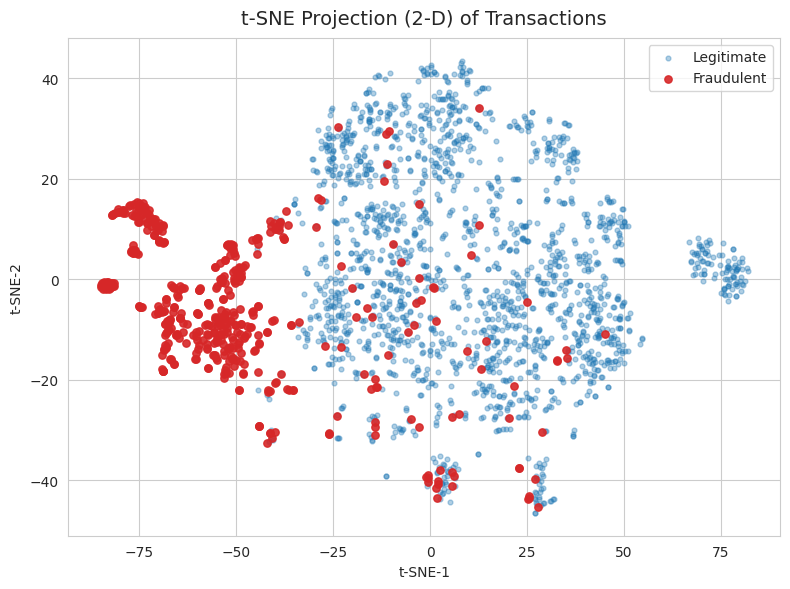

In [ ]:
##### visualise qualitative separability with t-SNE on a stratified sample
###### build a small, class-aware sample
fraud_df = df[df["Class"] == 1]
legit_df = df[df["Class"] == 0].sample(n=min(len(df[df["Class"]==0]), 4*len(fraud_df)),
                                       random_state=42)
sample = pd.concat([fraud_df, legit_df]).sample(frac=1, random_state=42).reset_index(drop=True)
###use numeric features, drop label, scaling helps t-SNE##
X = sample.drop(columns=["Class"]).select_dtypes(include=[np.number]).fillna(0.0).values
y = sample["Class"].values
X = StandardScaler().fit_transform(X)
#### set perplexity safely (< (n-1)/3)###
n = X.shape[0]
perp = max(5, min(30, (n - 1) // 3))
tsne = TSNE(n_components=2, perplexity=perp, learning_rate="auto",
            init="pca", n_iter=1000, random_state=42, verbose=0)
Z = tsne.fit_transform(X)
#### plot withlegit semitransparent so fraud point sare visible##
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(Z[y==0,0], Z[y==0,1], s=12, c="#1f77b4", alpha=0.35, label="Legitimate")
ax.scatter(Z[y==1,0], Z[y==1,1], s=28, c="#d62728", alpha=0.9, label="Fraudulent")
ax.set_title("t-SNE Projection (2-D) of Transactions", pad=10, fontsize=14)
ax.set_xlabel("t-SNE-1"); ax.set_ylabel("t-SNE-2")
ax.legend(loc="best")
plt.tight_layout(); plt.show()

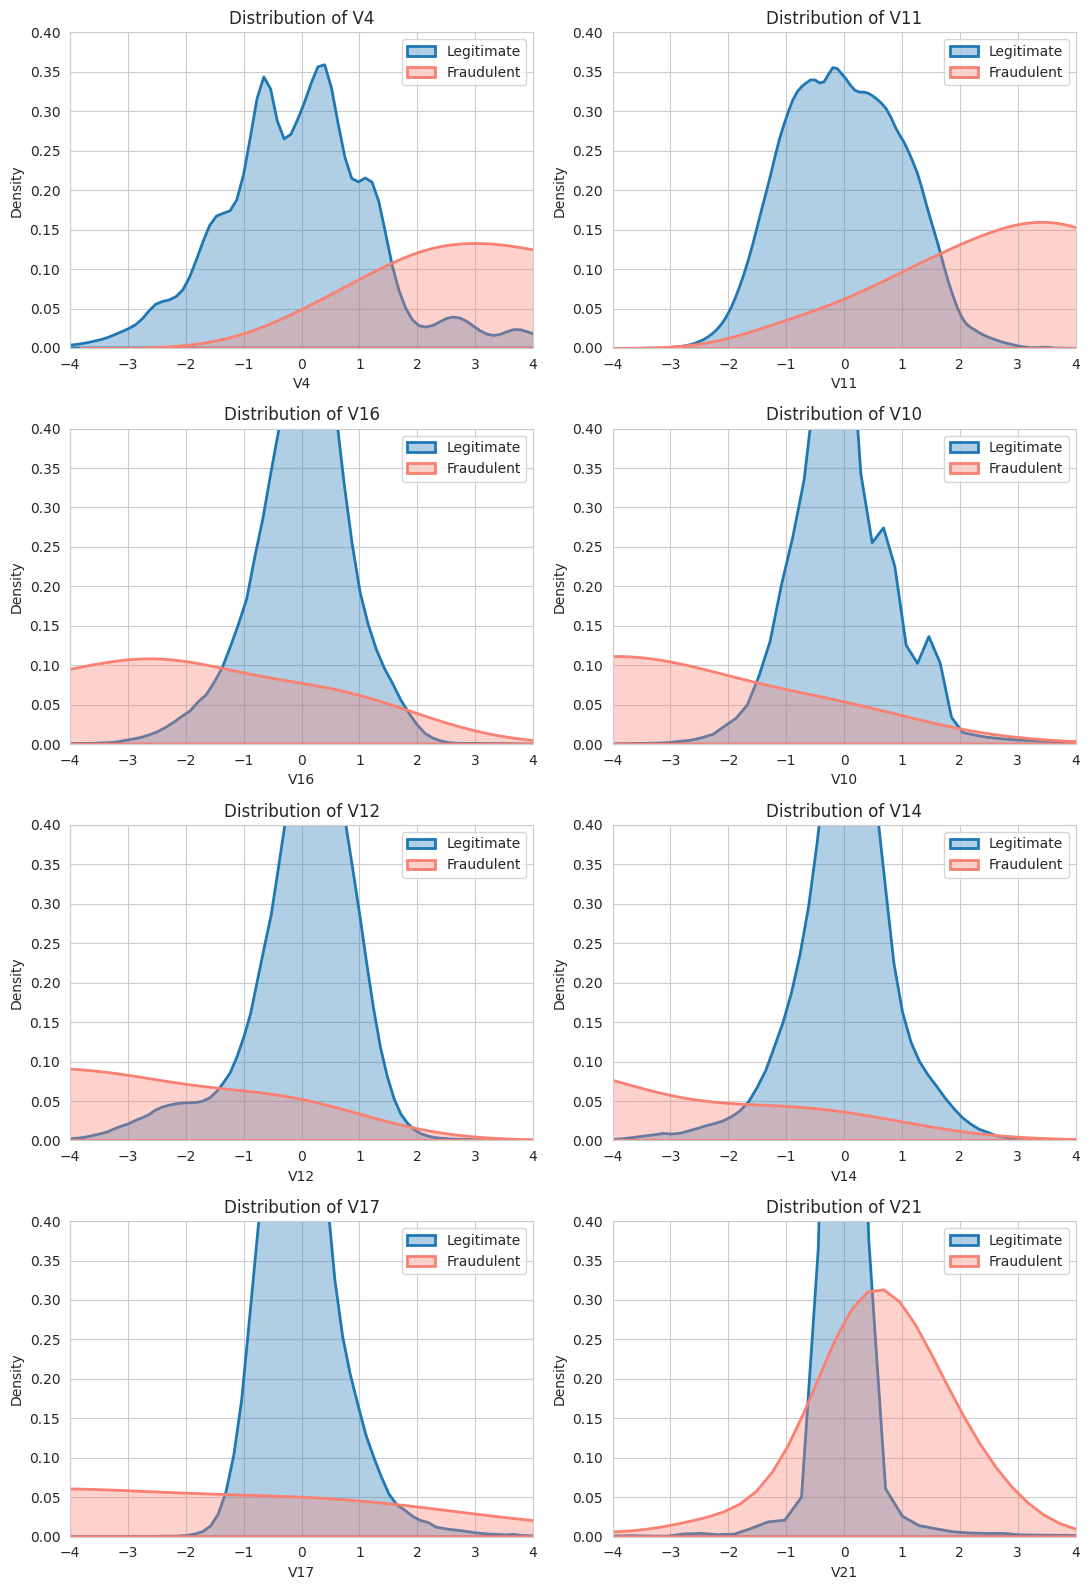

In [ ]:
#### use a clean style###
sns.set_style("whitegrid")
###### I pick the eight features I want to show (top to bottom, left to right)
features = ["V4", "V11", "V16", "V10", "V12", "V14", "V17", "V21"]
#### split the data by class once to keep the plotting loop tidy
legit_df = df[df["Class"] == 0]
fraud_df = df[df["Class"] == 1]
##### build a 4 x 2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(11, 16))
axes = axes.ravel()
for ax, feat in zip(axes, features):
    #### plot the KDE for legitimate transactions
    sns.kdeplot(
        data=legit_df, x=feat, fill=True, alpha=0.35, linewidth=2,
        color="tab:blue", label="Legitimate", ax=ax
    )
    ##### overlay the KDE for fraudulent transactions
    sns.kdeplot(
        data=fraud_df, x=feat, fill=True, alpha=0.35, linewidth=2,
        color="salmon", label="Fraudulent", ax=ax
    )
    #######itle each panel and keep the same axes ranges to make shapes comparable
    ax.set_title(f"Distribution of {feat}")
    ax.set_xlim(-4, 4)
    ax.set_ylim(0, 0.40)
    ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

### **2.3.4. Temporal Analysis**

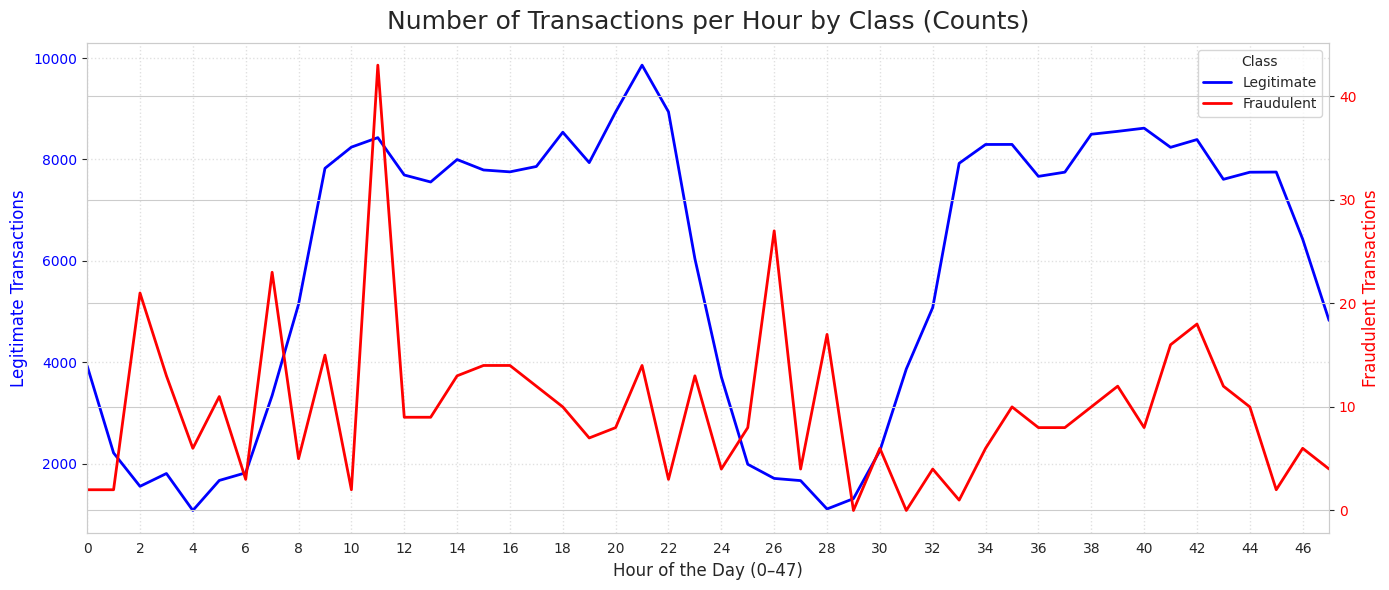

In [ ]:

######derive an hour bucket 0–47 from the 'Time' colunm - seconds since datasetstart
df_tmp = df[['Time', 'Class']].copy()
df_tmp['Hour'] = (df_tmp['Time'] // 3600).astype(int).clip(0, 47)
##### count transactions per hour for each class and ensure every hour 0–47 ispresent
counts = (
    df_tmp.groupby(['Hour', 'Class'])
          .size()
          .unstack(fill_value=0)            #####columns: 0 = Legitimate, 1 = Fraudulent
          .reindex(range(48), fill_value=0) ######make sure all 48 hours appear
)
hours = counts.index
legit = counts.get(0)  # ##### counts for Class 0 (Legitimate)
fraud = counts.get(1)  ####counts for Class 1 (Fraudulent)
#########plot with twin y-axes so the tiny fraud counts are still readable
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()
line1, = ax1.plot(hours, legit, color='blue', linewidth=2)
line2, = ax2.plot(hours, fraud, color='red', linewidth=2)
###### add titles,labels,andstyling
ax1.set_title("Number of Transactions per Hour by Class (Counts)", fontsize=18, pad=10)
ax1.set_xlabel("Hour of the Day (0–47)", fontsize=12)
ax1.set_ylabel("Legitimate Transactions", fontsize=12, color='blue')
ax2.set_ylabel("Fraudulent Transactions", fontsize=12, color='red')
#####color the tick labels to match each axis
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')
#######tidy up axes and grid
ax1.set_xlim(0, 47)
ax1.set_xticks(range(0, 48, 2))
ax1.grid(True, which="both", linestyle=":", linewidth=1, alpha=0.6)
########create a single legend combining both lines
ax1.legend([line1, line2], ["Legitimate", "Fraudulent"], title="Class", loc="upper right")
plt.tight_layout()
plt.show()

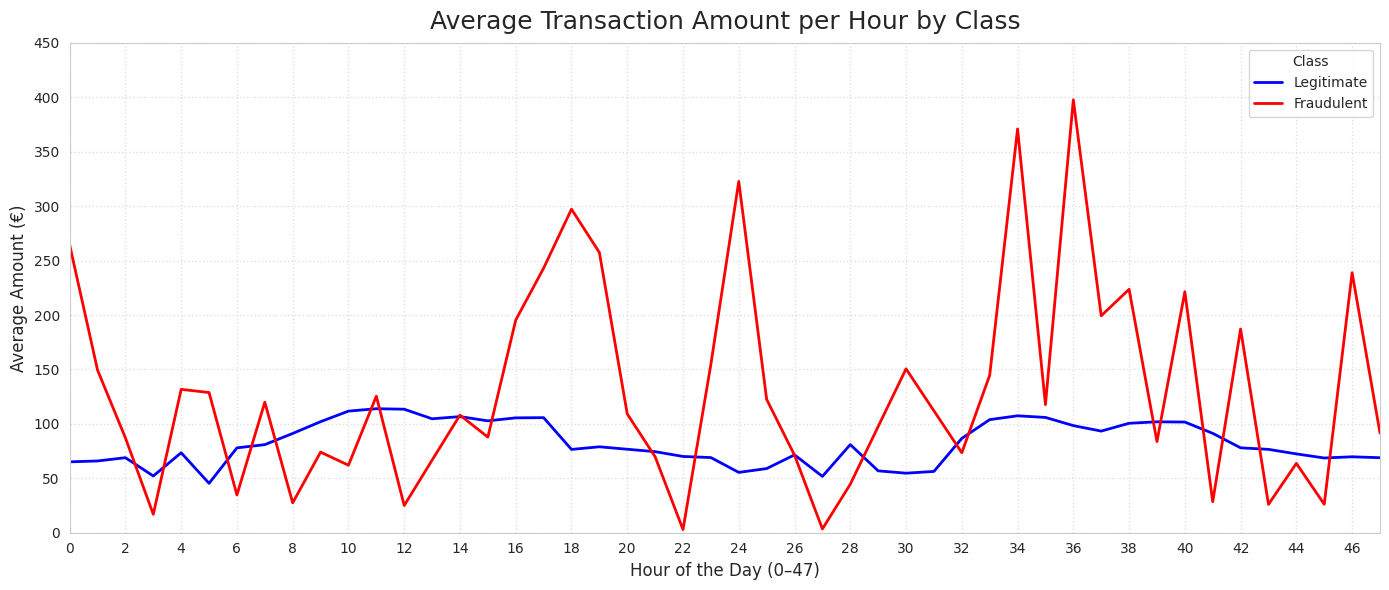

In [ ]:
####Figure 4.3.
### derive the hour bucket, 0–47, from 'Time'
df_tmp = df[['Time', 'Amount', 'Class']].copy()
df_tmp['Hour'] = (df_tmp['Time'] // 3600).astype(int).clip(0, 47)
##### compute the hourly mean amount for each class and keep all 48 hours
avg = (
    df_tmp.groupby(['Hour', 'Class'])['Amount']
          .mean()
          .unstack()                     ###### columns: 0=Legitimate, 1=Fraudulent
          .reindex(range(48))            #### ensure 0–47 present
)
######interpolate missing hourly means so the line doesn't break
#########This preserves the overall pattern while filling gaps where a class had no transactions in that hour
avg_interp = avg.copy()
avg_interp[0] = avg_interp[0].interpolate(limit_direction='both').bfill().ffill()
avg_interp[1] = avg_interp[1].interpolate(limit_direction='both').bfill().ffill()
hours = avg_interp.index
legit = avg_interp[0].to_numpy()
fraud = avg_interp[1].to_numpy()
######set the y-axis limit based on the series###
ymax = float(np.nanmax(np.r_[legit, fraud]))
ymax = max(1.0, np.ceil(ymax * 1.1 / 50) * 50)
######plot the continuous lines
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(hours, legit, label="Legitimate", color="blue", linewidth=2)
ax.plot(hours, fraud, label="Fraudulent", color="red", linewidth=2)
ax.set_title("Average Transaction Amount per Hour by Class", fontsize=18, pad=10)
ax.set_xlabel("Hour of the Day (0–47)", fontsize=12)
ax.set_ylabel("Average Amount (€)", fontsize=12)
ax.set_xlim(0, 47)
ax.set_ylim(0, ymax)
ax.set_xticks(range(0, 48, 2))
ax.grid(True, which="both", linestyle=":", linewidth=1, alpha=0.6)
ax.legend(title="Class", loc="upper right")
plt.tight_layout()
plt.show()

# **3. Data Preprocessing & Feature Engineering**

## **3.1. Feature Scaling and Transformation**

In [ ]:
#####Feature engineering adn split (eak-free
######build only deterministic features before I splitt.
df_fe = df.copy()
##### add safe, deterministic features
df_fe["Amount_Log"] = np.log1p(df_fe["Amount"])
df_fe["HourOfDay"]  = ((df_fe["Time"] % 86400) // 3600).astype(int)    #### 0..23 within day
df_fe["Hour_48"]    = (df_fe["Time"] // 3600).clip(0, 47).astype(int)  ##### 0..47 since dataset start
df_fe["Hour_sin"]   = np.sin(2*np.pi*df_fe["HourOfDay"]/24.0)
df_fe["Hour_cos"]   = np.cos(2*np.pi*df_fe["HourOfDay"]/24.0)
pca_cols     = [f"V{i}" for i in range(1,29)]
feature_cols = pca_cols + ["Amount_Log","HourOfDay","Hour_48","Hour_sin","Hour_cos"]
X = df_fe[feature_cols].copy()
y = df_fe["Class"].astype(int).copy()
#####split before any fitting to avoid leakage
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)
###### fit the scaler only on X_train=Nets or GAN benefit from scaling
scale_for = pca_cols + ["Amount_Log"]   #######sin/cos already [-1,1], HourOfDay/Hour_48 are discrete
scaler = RobustScaler().fit(X_train[scale_for])
X_train_sc = X_train.copy(); X_train_sc[scale_for] = scaler.transform(X_train_sc[scale_for])
X_val_sc   = X_val.copy();   X_val_sc[scale_for]   = scaler.transform(X_val_sc[scale_for])
X_test_sc  = X_test.copy();  X_test_sc[scale_for]  = scaler.transform(X_test_sc[scale_for])
print("Unscaled:", X_train.shape, X_val.shape, X_test.shape)
print("Scaled columns:", len(scale_for), "→", scale_for[:6], "...")

Unscaled: (198608, 33) (42559, 33) (42559, 33)
Scaled columns: 29 → ['V1', 'V2', 'V3', 'V4', 'V5', 'V6'] ...


In [ ]:
###### Feature Engineering###
########make sure required columns exist###
need_cols = ["Time", "Amount", "Class"] + [f"V{i}" for i in range(1, 29)]
missing = [c for c in need_cols if c not in df.columns]
assert not missing, f"Missing columns in df: {missing}"
df_fe = df.copy()
##### deterministic features, safe before split ###
df_fe["Amount_Log"]  = np.log1p(df_fe["Amount"])                         ### reduce skew
df_fe["Hour_48"]     = (df_fe["Time"] // 3600).clip(0, 47).astype(int)   ## 0..47 since start
df_fe["HourOfDay"]   = (df_fe["Time"] % 86400 // 3600).astype(int)       ## 0..23 within day
df_fe["Hour_sin"]    = np.sin(2*np.pi*df_fe["HourOfDay"]/24.0)           ##### cyclical time, optional.
df_fe["Hour_cos"]    = np.cos(2*np.pi*df_fe["HourOfDay"]/24.0)
pca_cols   = [f"V{i}" for i in range(1, 29)]
feats      = pca_cols + ["Amount_Log","Hour_48","HourOfDay","Hour_sin","Hour_cos"]
###### quick NaN check on engineered features
assert not df_fe[feats + ["Class"]].isna().any().any(), "NaNs found after FE — check inputs."
X_all = df_fe[feats].copy()
y_all = df_fe["Class"].astype(int).copy()
######save this for WGAN and DQN to guarantee the same column order later
gan_feature_cols = feats
print("Feature set:", X_all.shape, " example:", X_all.columns[:8].tolist(), "...")


Feature set: (283726, 33)  example: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'] ...


## **3.2. Splitting Data into Training, Validation, and Test Sets**

In [ ]:
#####  feature engineering
X_train, X_temp, y_train, y_temp = train_test_split(
    X_all, y_all, test_size=0.30, random_state=42, stratify=y_all
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)
print("___Data Splitting Complete___")
print(f"X_train: {X_train.shape} | X_val: {X_val.shape} | X_test: {X_test.shape}")
######ensuereey no leakage, disjoint indices, full coverage
n_total = len(X_all)
train_idx, val_idx, test_idx = set(X_train.index), set(X_val.index), set(X_test.index)
assert train_idx.isdisjoint(val_idx) and train_idx.isdisjoint(test_idx) and val_idx.isdisjoint(test_idx), "Split overlap found."
assert len(train_idx | val_idx | test_idx) == n_total, "Splits do not cover all rows."
#######quick class summaries, helps verify stratify worked
def summarize_split(name, y):
    n = len(y)
    n_pos = int((y == 1).sum())
    n_neg = n - n_pos
    prev = (n_pos / n) if n else 0.0
    print(f"{name}: n={n:,} | Legit={n_neg:,} | Fraud={n_pos:,} | Fraud Prevalence={prev:.3%}")
summarize_split("Train", y_train)
summarize_split("Val",   y_val)
summarize_split("Test",  y_test)

___Data Splitting Complete___
X_train: (198608, 33) | X_val: (42559, 33) | X_test: (42559, 33)
Train: n=198,608 | Legit=198,277 | Fraud=331 | Fraud Prevalence=0.167%
Val: n=42,559 | Legit=42,488 | Fraud=71 | Fraud Prevalence=0.167%
Test: n=42,559 | Legit=42,488 | Fraud=71 | Fraud Prevalence=0.167%


In [ ]:
#####define groups
pca_cols   = [c for c in X_all.columns if c.startswith("V")]
amount_col = ["Amount_Log"]
time_cols  = ["Hour_48","HourOfDay","Hour_sin","Hour_cos"]
#######  Classifier or NN ot IFor XGB scaling, Robust on PCA and Amount; passthrough time
preproc_ct = ColumnTransformer(
    transformers=[
        ("pca_robust",  RobustScaler(),               pca_cols),
        ("amt_robust",  RobustScaler(),               amount_col),
        ("time_pass",   "passthrough",                time_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False,   #####cleaner names
)
preproc_ct.fit(X_train)
#### get output feature order to keep df tidy
clf_feature_cols = list(preproc_ct.get_feature_names_out())
#####transform each split and wrap as DataFrames, keeps indices aligned###
X_train_sc = pd.DataFrame(preproc_ct.transform(X_train), columns=clf_feature_cols, index=X_train.index)
X_val_sc   = pd.DataFrame(preproc_ct.transform(X_val),   columns=clf_feature_cols, index=X_val.index)
X_test_sc  = pd.DataFrame(preproc_ct.transform(X_test),  columns=clf_feature_cols, index=X_test.index)
print("Scaled (classifier) shapes:", X_train_sc.shape, X_val_sc.shape, X_test_sc.shape)
####GAN scaler (MinMax to [-1, 1]) for all engineered features used by the GAN####
#####re-use the exact feature order saved earlier in FE as `gan_feature_cols`###
assert "gan_feature_cols" in globals(), "Missing `gan_feature_cols` from the FE code."
gan_scaler = MinMaxScaler(feature_range=(-1, 1))
gan_scaler.fit(X_train[gan_feature_cols])   #####fit on train only, no leakage
print("GAN scaler fitted on features:", len(gan_feature_cols))

Scaled (classifier) shapes: (198608, 33) (42559, 33) (42559, 33)
GAN scaler fitted on features: 33


 # **4. Modeling**

## **4.1. Model 1: Isolation Forest (Unsupervised Anomaly Detection)**

### **4.1.1. Hyperparameter Tuning with GridSearchCV**

In [ ]:
f1_scorer = make_scorer(f1_score, pos_label=1)
param_grid = {
    'iso__n_estimators': [100, 200, 300],
    'iso__max_samples': ['auto', 0.8],
    'iso__max_features': [0.8, 1.0],
}
iso_pipe = Pipeline([
    ("prep", preproc_ct),
    ("iso", IsolationForest(contamination=0.00172, random_state=42))
])
print("__Starting Hyperparameter Search for Isolation Forest__")
iso_forest_grid = GridSearchCV(
    estimator=iso_pipe,
    param_grid=param_grid,
    scoring=f1_scorer,   #####uses y only for scoring
    cv=3,
    n_jobs=-1
)
iso_forest_grid.fit(X_train, y_train)
print("Best params:", iso_forest_grid.best_params_)
best_iso_forest = iso_forest_grid.best_estimator_

__Starting Hyperparameter Search for Isolation Forest__


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best params: {'iso__max_features': 0.8, 'iso__max_samples': 'auto', 'iso__n_estimators': 100}


### **4.1.2. Optimal Threshold Search on Validation Set**


In [ ]:
#####Optimal Threshold Search on Validation Set, consolidated and pipeline-safe
assert 'best_iso_forest' in globals(),
assert 'X_val' in globals() and 'y_val' in globals(),
##### Get anomaly scores, lower = more anomalous
def get_if_scores(pipeline, X):
    #####pipeline to decision_function####
    if hasattr(pipeline, "decision_function"):
        try:
            return pipeline.decision_function(X)
        except Exception:
            pass
    ####### pipeline to score_samples
    if hasattr(pipeline, "score_samples"):
        try:
            return pipeline.score_samples(X)
        except Exception:
            pass
    ####### transform then call final IsolationForest step directly
    Xp = pipeline.named_steps['prep'].transform(X)
    iso = pipeline.named_steps['iso']
    if hasattr(iso, "decision_function"):
        return iso.decision_function(Xp)
    return iso.score_samples(Xp)
val_scores = get_if_scores(best_iso_forest, X_val)
####### Sweep thresholds to maximise F1, fraud = 1 when score below thr
low, high = np.percentile(val_scores, [1, 99])
thr_grid = np.linspace(low, high, 200)

best_f1, best_thr = -1.0, None
for t in thr_grid:
    y_pred = (val_scores < t).astype(int)
    f1 = f1_score(y_val, y_pred)
    if f1 > best_f1:
        best_f1, best_thr = f1, t
print("___Optimal Threshold Search Complete____")
print(f"Best F1 on validation: {best_f1:.4f}")
print(f"Chosen threshold: {best_thr:.6f}")
iso_threshold_ = best_thr  ######keep for test set

___Optimal Threshold Search Complete____
Best F1 on validation: 0.1569
Chosen threshold: 0.071416


## **4.2. Model 2: XGBoost with BorderlineSMOTE (Supervised Classification)**

### **4.2.1. Defining the Imbalanced-Learning Pipeline**

### **4.2.2. Hyperparameter Tuning with RandomizedSearchCV**


In [ ]:
#######XGBoost and BorderlineSmote inside a leak-free pipeline, uses 'preprocess' defined earlier
xgb_pipe = Pipeline([
    ("prep", preproc_ct),  ####### ColunmTransformer
    ("sampler", BorderlineSMOTE(random_state=42)),
    ("clf", XGBClassifier(
        random_state=42, eval_metric='logloss', tree_method="hist", use_label_encoder=False
    ))
])
param_dist = {
    'clf__n_estimators': [100, 200, 300, 500],
    'clf__max_depth': [3, 5, 7, 10],
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__subsample': [0.7, 0.8, 0.9],
    'clf__colsample_bytree': [0.7, 0.8, 0.9],
    'clf__gamma': [0, 0.25, 0.5, 1.0],
}
random_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist,
    n_iter=50,
    scoring='average_precision',     ######AUPRC
    cv=5,
    n_jobs=-1,
    random_state=42
)
print("___ Starting Hyperparameter Search (XGBoost) ___")
random_search.fit(X_train, y_train)
best_model_pipeline = random_search.best_estimator_
print("Best params:", random_search.best_params_)
print(f"Best CV AUPRC: {random_search.best_score_:.4f}")

___ Starting Hyperparameter Search (XGBoost) ___


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:50:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'clf__subsample': 0.8, 'clf__n_estimators': 500, 'clf__max_depth': 7, 'clf__learning_rate': 0.2, 'clf__gamma': 0, 'clf__colsample_bytree': 0.9}
Best CV AUPRC: 0.8537


# **5. Model Evaluation and Comparison**

## **5.1. Defining the Evaluation Function**

In [ ]:
######Defining the Evaluation Function
def evaluate_model(y_true, y_pred, y_pred_proba, model_name='Model'):
    print(f"--- {model_name} Evaluation ---")
    #####Classification report
    print("\n--- Classification Report ---")
    print(classification_report(y_true, y_pred, target_names=['Legitimate (0)', 'Fraud (1)']))
    #######Metrics
    mcc   = matthews_corrcoef(y_true, y_pred)
    auprc = average_precision_score(y_true, y_pred_proba)
    f2    = fbeta_score(y_true, y_pred, beta=2.0)  #####recall-weighted
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"Area Under Precision-Recall Curve (AUPRC): {auprc:.4f}")
    print(f"F2-score (Recall-weighted): {f2:.4f}")
    #####Confusion Matrix
    print("\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'])
    plt.xlabel('Predicted Label'); plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    ####Precision-Recall Curve
    print("\n--- Precision-Recall Curve ---")
    precision_points, recall_points, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(recall_points, precision_points, linewidth=2, label=f'AUPRC = {auprc:.4f}')
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='lower left'); plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()
    return {"MCC": mcc, "AUPRC": auprc, "F2": f2}

## **5.2. Evaluating the Optimised XGBoost Model**



--- Optimised XGBoost Evaluation ---

--- Classification Report ---
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     42488
     Fraud (1)       0.93      0.77      0.85        71

      accuracy                           1.00     42559
     macro avg       0.97      0.89      0.92     42559
  weighted avg       1.00      1.00      1.00     42559

Matthews Correlation Coefficient (MCC): 0.8496
Area Under Precision-Recall Curve (AUPRC): 0.8238
F2-score (Recall-weighted): 0.8017

--- Confusion Matrix ---


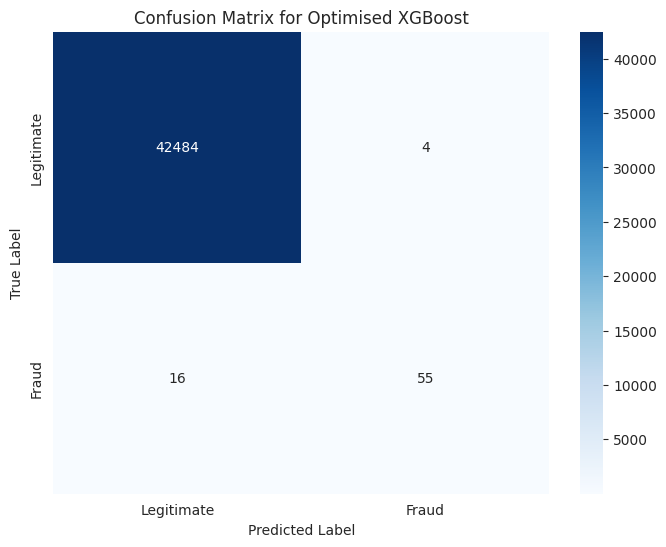


--- Precision-Recall Curve ---


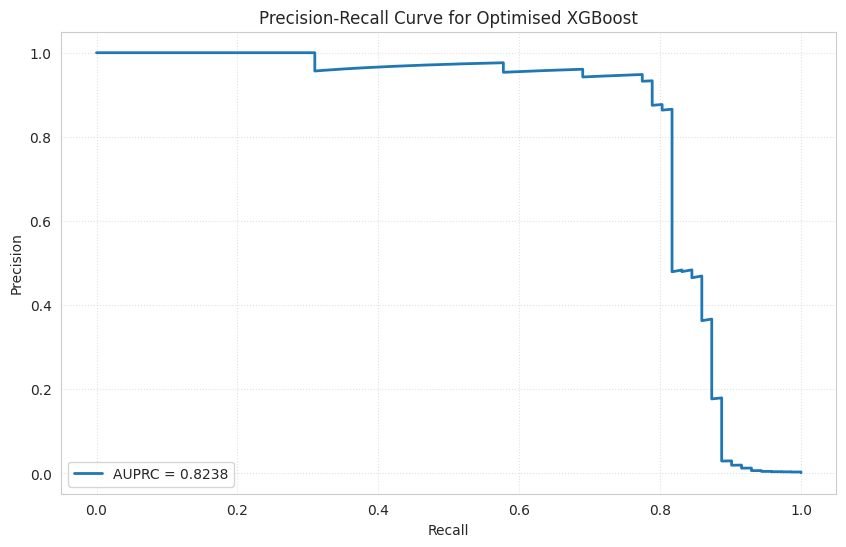

In [ ]:
#####Uses the tuned, leak-free pipeline
y_pred_best = best_model_pipeline.predict(X_test)
y_pred_proba_best = best_model_pipeline.predict_proba(X_test)[:, 1]
_ = evaluate_model(
    y_true=y_test,
    y_pred=y_pred_best,
    y_pred_proba=y_pred_proba_best,
    model_name='Optimised XGBoost'
)

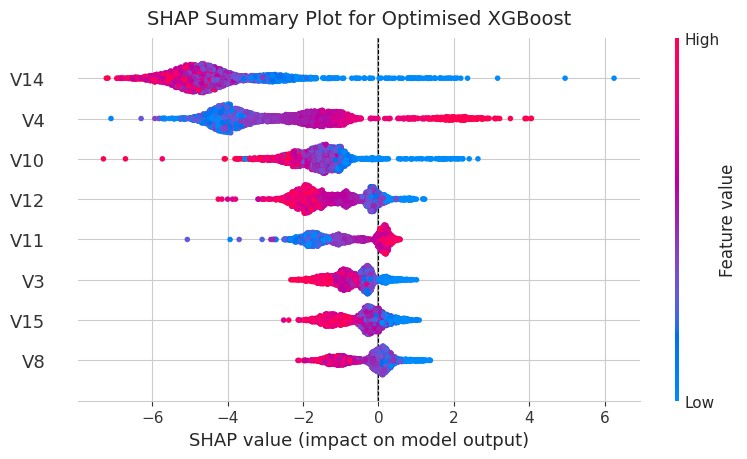

In [ ]:
##### SHAP summary plot for the best XGBoost in pipeline
#####best_model_pipeline fitted, X_test or X_val, and raw column names.
#######pull pieces from fitted pipeline
xgb_model = best_model_pipeline.named_steps["clf"]     ####XGBClassifier
preproc   = best_model_pipeline.named_steps["prep"]    #colunmTransformer
######choose a split to explain use test if available, else val
X_source = "test" if "X_test" in globals() else "val"
X_raw    = X_test if X_source == "test" else X_val
###transorm features exactly as the pipeline does
X_tr = preproc.transform(X_raw)
###ensure dense for SHAP
if sparse.issparse(X_tr):
    X_tr = X_tr.toarray()
####get pretty feature names from the preprocesor
try:
    feat_names = preproc.get_feature_names_out()
except Exception:
    ###fallback; try without args makes it readable
    feat_names = np.array([str(i) for i in range(X_tr.shape[1])])
#####clean names like "scale__V14" to "V14"
feat_names = np.array([n.split("__")[-1] for n in feat_names])
###subsample for speed
n_show = min(3000, X_tr.shape[0])
idx    = np.random.RandomState(42).choice(X_tr.shape[0], size=n_show, replace=False)
X_plot = X_tr[idx]
####build explainer and  SHAP values
explainer   = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_plot)
####make the beeswarm plot (top 8 feature)
shap.summary_plot(
    shap_values,
    X_plot,
    feature_names=feat_names,
    max_display=8,
    show=False
)
plt.title("SHAP Summary Plot for Optimised XGBoost", fontsize=14, pad=10)
plt.axvline(0, color="k", linestyle="--", linewidth=0.8)  #######vertical zero line
plt.tight_layout()
plt.show()

## **5.3. Evaluating the Optimised Isolation Forest Model**

--- Optimised Isolation Forest Evaluation ---

--- Classification Report ---
                precision    recall  f1-score   support

Legitimate (0)       1.00      0.99      0.99     42488
     Fraud (1)       0.09      0.61      0.16        71

      accuracy                           0.99     42559
     macro avg       0.55      0.80      0.58     42559
  weighted avg       1.00      0.99      0.99     42559

Matthews Correlation Coefficient (MCC): 0.2339
Area Under Precision-Recall Curve (AUPRC): 0.2147
F2-score (Recall-weighted): 0.2870

--- Confusion Matrix ---


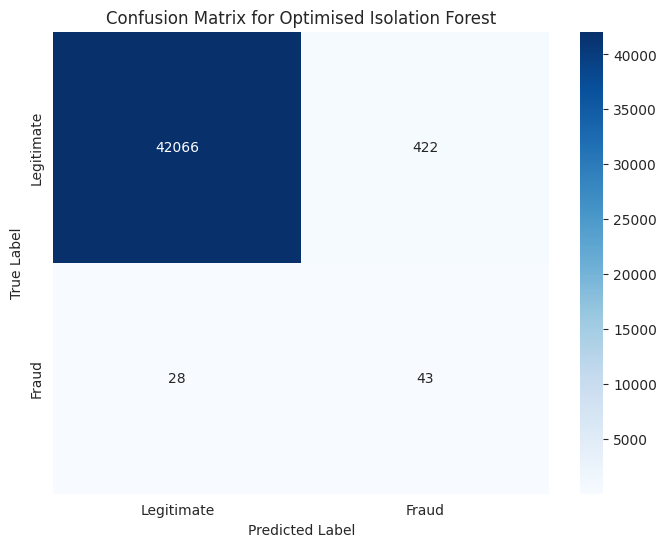


--- Precision-Recall Curve ---


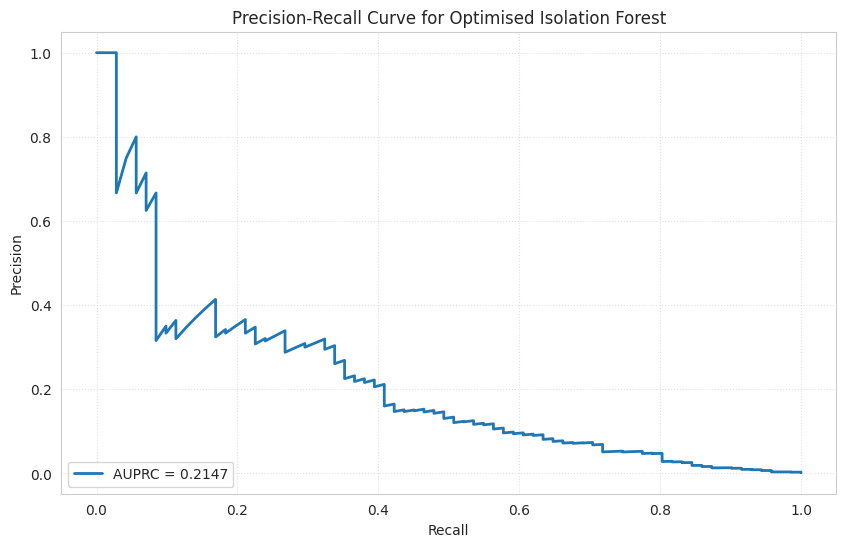

In [ ]:
####### 5.3. Evaluating the Optimised Isolation Forest Model
### Preconditions:
#### best_iso_forest to from IF GridSearchCV, pipeline: prep to iso
####### evaluate_model()  defined earlier
def _if_scores(pipeline, X):
    ##### Try the pipeline methods first
    if hasattr(pipeline, "decision_function"):
        try:
            return pipeline.decision_function(X)      #### lower = more anomalous
        except Exception:
            pass
    if hasattr(pipeline, "score_samples"):
        try:
            return pipeline.score_samples(X)          # ###lower = more anomalous (same directoin)
        except Exception:
            pass
    ###### transform then call the final Isolayoin Forets
    Xp  = pipeline.named_steps['prep'].transform(X)
    iso = pipeline.named_steps['iso']
    if hasattr(iso, "decision_function"):
        return iso.decision_function(Xp)
    return iso.score_samples(Xp)
if 'iso_threshold_' not in globals():
    vs = _if_scores(best_iso_forest, X_val)
    lo, hi = np.percentile(vs, [1, 99])
    iso_threshold_ = np.linspace(lo, hi, 200)[100]   ##### mid of a robust range
    ### Test-time predictions
test_scores = _if_scores(best_iso_forest, X_test)
y_pred_if   = (test_scores < iso_threshold_).astype(int)
# #####For AUPRC, pass a score where higher = "more likely fraud". Since IF uses lower equals more anomalous,
# ##negate the score so higher is more fraud.
_ = evaluate_model(
    y_true=y_test,
    y_pred=y_pred_if,
    y_pred_proba=-test_scores,
    model_name='Optimised Isolation Forest'
)

# **6. Proposed Hybrid Frameworks**


## **6.1. Part A: Synthetic Fraud Data Generation with WGAN-GP (Fraud-only)**


### **6.1.1. Preparing Fraud Data for GAN Training**

In [ ]:
#######prepare to train fraud-only data for GAN, using a high-signal subset and leak-free scaling.
for nm in ["X_train","y_train","X_val","X_test"]:
    assert nm in globals(), f"Missing {nm}. I need to run the FE + split code first."
#### I pick a focused subset of high-signal features for the GAN to learn.
gan_subset_cols = ["V10","V12","V14","V17","Amount_Log","Hour_sin","Hour_cos"]
missing = [c for c in gan_subset_cols if c not in X_train.columns]
assert not missing, f"GAN subset has missing columns: {missing}"
### I fit a dedicated MinMax scaler to [-1, 1] on train all classes for columns.
#### train-only avoids leakage; fitting on both classes makes ranges robust.
gan_subset_scaler = MinMaxScaler(feature_range=(-1, 1))
gan_subset_scaler.fit(X_train[gan_subset_cols])
####extract train fraud rows, real fraud only, then transform to the GAN space [-1, 1]
fraud_train_real = X_train.loc[y_train == 1, gan_subset_cols].astype("float32").values
fraud_train_g    = gan_subset_scaler.transform(fraud_train_real).astype("float32")
print("GAN subset columns:", gan_subset_cols)
print("Real TRAIN fraud (raw):", fraud_train_real.shape, "| after MinMax [-1,1]:", fraud_train_g.shape)
######keep handy counts for later
n_fraud_train = fraud_train_g.shape[0]
print("Fraud samples available for GAN training:", n_fraud_train)

GAN subset columns: ['V10', 'V12', 'V14', 'V17', 'Amount_Log', 'Hour_sin', 'Hour_cos']
Real TRAIN fraud (raw): (331, 7) | after MinMax [-1,1]: (331, 7)
Fraud samples available for GAN training: 331


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
#######I defined a stronger WGAN-GP: wider critic, TTUR, stable hyperparams.
assert "gan_subset_cols" in globals(), ' first to define gan_subset_cols.'
tf.keras.utils.set_random_seed(42)
latent_dim = 128
data_dim   = len(gan_subset_cols)   #####align the subset used for GAN
def make_generator():
    ##### I ketpt the generator simple; the critic bears most of the capacity.
    return Sequential([
        Input(shape=(latent_dim,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(data_dim, activation='tanh')  ######outputs in [-1, 1]
    ], name="Generator")
def make_discriminator():
    ####I make the critic: discriminator, deeper and wider, with LayerNorm.
    return Sequential([
        Input(shape=(data_dim,)),
        layers.Dense(512, activation='relu'),
        layers.LayerNormalization(),
        layers.Dense(512, activation='relu'),
        layers.LayerNormalization(),
        layers.Dense(256, activation='relu'),
        layers.LayerNormalization(),
        layers.Dense(1)  #### critic score
    ], name="Discriminator")
generator     = make_generator()
discriminator = make_discriminator()
#### TTUR: Two-Time-Scale Update Rule: faster critic, slower generator.
gen_opt  = tf.keras.optimizers.Adam(learning_rate=5e-5, beta_1=0.0, beta_2=0.9)
disc_opt = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.0, beta_2=0.9)
λ_gp     = 10.0
n_critic = 5
BATCH    = 128
EPOCHS   = 400
@tf.function
def gradient_penalty(real, fake):
    bsz = tf.shape(real)[0]
    eps = tf.random.uniform([bsz, 1], 0.0, 1.0)
    inter = eps*real + (1.0 - eps)*fake
    with tf.GradientTape() as gp_tape:
        gp_tape.watch(inter)
        pred = discriminator(inter, training=True)
    grads = gp_tape.gradient(pred, inter)
    norm  = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=1) + 1e-8)
    return λ_gp * tf.reduce_mean((norm - 1.0)**2)
@tf.function
def train_critic(real_batch):
    noise = tf.random.normal([tf.shape(real_batch)[0], latent_dim])
    with tf.GradientTape() as tape:
        fake     = generator(noise, training=True)
        real_out = discriminator(real_batch, training=True)
        fake_out = discriminator(fake, training=True)
        wloss    = tf.reduce_mean(fake_out) - tf.reduce_mean(real_out)
        gp       = gradient_penalty(real_batch, fake)
        loss     = wloss + gp
    grads = tape.gradient(loss, discriminator.trainable_variables)
    disc_opt.apply_gradients(zip(grads, discriminator.trainable_variables))
    return loss
@tf.function
def train_generator(bsz):
    noise = tf.random.normal([bsz, latent_dim])
    with tf.GradientTape() as tape:
        fake = generator(noise, training=True)
        fake_out = discriminator(fake, training=True)
        loss = -tf.reduce_mean(fake_out)
    grads = tape.gradient(loss, generator.trainable_variables)
    gen_opt.apply_gradients(zip(grads, generator.trainable_variables))
    return loss

### **6.1.3. WGAN-GP Training Loop**

In [ ]:
##### I train WGAN-GP on train fraud-only, subset features, [-1,1] space.
for nm in ["fraud_train_g", "generator", "discriminator", "train_critic", "train_generator", "BATCH", "EPOCHS", "n_critic"]:
    assert nm in globals(), f"Missing `{nm}` —"
# ###I ensure the dataset is float32 and non-empty
fraud_train_g = tf.cast(fraud_train_g, tf.float32)
assert int(fraud_train_g.shape[0]) > 0, "No fraud rows in train — check split or filters."
#####If I have fewer than batch samples, I kept the remainder instead of dropping it
drop_rem = bool(int(fraud_train_g.shape[0]) >= BATCH
ds = (tf.data.Dataset
      .from_tensor_slices(fraud_train_g)
      .shuffle(max(int(fraud_train_g.shape[0]), BATCH*4), seed=42)
      .batch(BATCH, drop_remainder=drop_rem))
t0 = time.time()
last_cl, last_gl = None, None
for epoch in range(1, EPOCHS + 1):
    for real_b in ds:
        # #####I updated the critic multiple times per gen step.
        for _ in range(n_critic):
            last_cl = train_critic(real_b)
        ####I updated the generator once
        last_gl = train_generator(tf.shape(real_b)[0])
    if epoch % 50 == 0 or epoch == 1:
        tf.print("Epoch", epoch, "| Critic:", last_cl, "| Gen:", last_gl)
print(f"WGAN-GP training complete. Took ~{time.time() - t0:.1f}s")

Epoch 1 | Critic: 175.976532 | Gen: 0.196438134
Epoch 50 | Critic: -0.217086583 | Gen: 0.311410487
Epoch 100 | Critic: -0.344061196 | Gen: 1.13277698
Epoch 150 | Critic: -0.251838923 | Gen: 0.773991764
Epoch 200 | Critic: -0.23438251 | Gen: 0.543671668
Epoch 250 | Critic: -0.342428058 | Gen: 0.48505345
Epoch 300 | Critic: -0.321792603 | Gen: 0.373436213
Epoch 350 | Critic: -0.273642302 | Gen: 0.267204374
Epoch 400 | Critic: -0.341833323 | Gen: 0.255726814
WGAN-GP training complete. Took ~32.2s


In [ ]:
######I checkde what my GAN expects verses what gan_feature_cols currently is.###
print("len(gan_feature_cols) =", len(gan_feature_cols))
print("gan_feature_cols (first 10) =", gan_feature_cols[:10])
probe = generator(tf.random.normal([2, latent_dim]), training=False).numpy()
print("generator output dim =", probe.shape[1])

len(gan_feature_cols) = 33
gan_feature_cols (first 10) = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
generator output dim = 7


### **6.1.4. Generating the Balanced Training Dataset**

In [ ]:
#####I reset the GAN subset to the 7 cols used during training and re-fit the scaler on that subset
###I hard-set the original 7-feature subset used for WGAN-GP##
gan_feature_cols = ["V10","V12","V14","V17","Amount_Log","Hour_sin","Hour_cos"]
#### rebuild the real train fraud subset on those 7 cols ##scaled space
fraud_subset_7 = pd.concat([X_train_sc, y_train], axis=1)
fraud_subset_7 = fraud_subset_7[fraud_subset_7["Class"]==1][gan_feature_cols].astype("float32").values
###I re-fit a clean scaler only on those 7 columns in train fraud
gan_scaler = MinMaxScaler(feature_range=(-1,1)).fit(fraud_subset_7)
##### my generator must output exactly 7 dims now
gx = generator(tf.random.normal([2, latent_dim]), training=False).numpy()
assert gx.shape[1] == len(gan_feature_cols), \
    f"Mismatch: generator outputs {gx.shape[1]} but gan_feature_cols has {len(gan_feature_cols)}"
print("OK - generator width =", gx.shape[1], "; gan_feature_cols size =", len(gan_feature_cols))

OK — generator width = 7 ; gan_feature_cols size = 7


In [ ]:
####I generated synthetic fraud, fix scaler mismatch if needed, and build a balanced train-set.
#####Safety checks and re-derive the exact GAN subset from train scaled
for nm in ["generator","latent_dim","gan_feature_cols","X_train_sc","y_train"]:
    assert nm in globals(), f"Missing `{nm}` — run FE + 6.1.1 + 6.1.2 + 6.1.3 first."
####I reconstructed the real fraud fraud subset for only the GAN column.
fraud_subset = pd.concat([X_train_sc, y_train], axis=1)
fraud_subset = fraud_subset[fraud_subset["Class"] == 1][gan_feature_cols].astype("float32").values
####### I refit it on the correct 7-column subset
if ("gan_scaler" not in globals()) or (getattr(gan_scaler, "n_features_in_", None) != len(gan_feature_cols)):
    print(f" Detected missing/mismatched `gan_scaler` "
          f"(had {getattr(gan_scaler, 'n_features_in_', 'None')}); refitting on GAN subset with "
          f"{len(gan_feature_cols)} features.")
    gan_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(fraud_subset)
### I also check that the generator outputs the same width as the GAN subset###
data_dim = len(gan_feature_cols)
_gz = tf.random.normal([2, latent_dim])
_gx = generator(_gz, training=False).numpy()
assert _gx.shape[1] == data_dim, f"Generator width {_gx.shape[1]} != len(gan_feature_cols) {data_dim}. " \
                                 f"Rebuild generator so its last Dense has units={data_dim}."
####Choose target fraud share for training ##tune 0.20–0.30
num_legit = int((y_train == 0).sum())
num_fraud = int((y_train == 1).sum())
desired_fraud = int(target_fraud_share * (num_legit + num_fraud) / (1 - target_fraud_share))
to_generate   = max(0, desired_fraud - num_fraud)
print(f"TRAIN legit={num_legit}, fraud={num_fraud} → generate {to_generate} synthetic fraud")
#### Sample in GAN space ([-1,1] for GAN cols), invert to real, subset, the righ sclaer ###
synth = []
CHUNK = 2048
left  = to_generate
while left > 0:
    b = min(CHUNK, left)
    z = tf.random.normal([b, latent_dim])
    fake_g = generator(z, training=False).numpy()      #### shape: b, data_dim##
    #####If scalre still mismatches for any reason.
    assert getattr(gan_scaler, "n_features_in_", None) == fake_g.shape[1], \
        f"gan_scaler has n_features_in_={getattr(gan_scaler,'n_features_in_',None)}, " \
        f"but generator output width is {fake_g.shape[1]}"
    fake_real_subset = gan_scaler.inverse_transform(fake_g)  #####back to real-valued space for GAN subset
    synth.append(fake_real_subset)
    left -= b
if len(synth):
    synth_subset_df = pd.DataFrame(np.vstack(synth).astype("float32"), columns=gan_feature_cols)
else:
    synth_subset_df = pd.DataFrame(columns=gan_feature_cols, dtype="float32")
print("Synthetic (subset, pre-filter):", synth_subset_df.shape)
###Plausibility filter, OCSVM, on real train fraud,subset
if len(synth_subset_df):
    if fraud_subset.shape[0] >= 50:
        oc = OneClassSVM(kernel="rbf", gamma="scale", nu=0.05).fit(fraud_subset)
        keep = oc.predict(synth_subset_df.values.astype("float32")) == 1
        print(f"OCSVM kept {keep.sum()}/{len(keep)} synthetic ({keep.mean()*100:.1f}%)")
        synth_subset_df = synth_subset_df.loc[keep].reset_index(drop=True)
    else:
        print("Skipping OCSVM filter (too few real fraud rows).")
#####Expand subset to full feature vecto, then label as fraud
synth_full = pd.DataFrame(columns=X_train_sc.columns, dtype="float32")
if len(synth_subset_df):
    synth_full = pd.DataFrame(0.0, index=np.arange(len(synth_subset_df)), columns=X_train_sc.columns, dtype="float32")
    #####Overwrite GAN subset columns
    for c in gan_feature_cols:
        synth_full[c] = synth_subset_df[c].astype("float32")
    ###fill remaining columns by sampling marginasl from real fraaud - scaled
    fraud_pool = pd.concat([X_train_sc, y_train], axis=1)
    fraud_pool = fraud_pool[fraud_pool["Class"] == 1].drop(columns="Class")
    rng = np.random.default_rng(42)
    for c in synth_full.columns:
        if c not in gan_feature_cols:
            synth_full[c] = rng.choice(fraud_pool[c].values, size=len(synth_full))
    synth_full["Class"] = 1
###Assemble final, scaled, train for neural models###
train_real = X_train_sc.copy()
train_real["Class"] = y_train.values
train_balanced_df = (pd.concat([train_real, synth_full], ignore_index=True)
                       .sample(frac=1.0, random_state=42)
                       .reset_index(drop=True))
X_train_balanced = train_balanced_df.drop(columns="Class")
y_train_balanced = train_balanced_df["Class"].astype(int).values
print("Balanced TRAIN:", X_train_balanced.shape)
print(pd.Series(y_train_balanced).value_counts().rename({0: "Legit", 1: "Fraud"}))

TRAIN legit=198277, fraud=331 → generate 65871 synthetic fraud
Synthetic (subset, pre-filter): (65871, 7)
OCSVM kept 29878/65871 synthetic (45.4%)
Balanced TRAIN: (228486, 33)
Legit    198277
Fraud     30209
Name: count, dtype: int64


## **6.2. Part B, Approach 1: Deep Q-Network (DQN) Classifier**

### **6.2.1. Defining the Prioritized Replay Buffer and DQN Agent**


In [ ]:
#####define a Double Dueling DQN suited for fixed-length vectors, static classification
tf.keras.utils.set_random_seed(42)
class PrioritizedBuffer:
    ###I keep a simple proportional-priority replay buffer
    def __init__(self, capacity=200_000, alpha=0.6):
        self.capacity = capacity
        self.alpha    = alpha
        self.data     = []
        self.prio     = []
        self.pos      = 0
    def add(self, transition, priority=1.0):
        if len(self.data) < self.capacity:
            self.data.append(transition)
            self.prio.append(priority)
        else:
            self.data[self.pos] = transition
            self.prio[self.pos] = priority
            self.pos = (self.pos + 1) % self.capacity
    def sample(self, batch_size, beta=0.4):
        n = len(self.data)
        if n == 0:
            raise ValueError("Replay buffer is empty, I need transitions before sampling.")
        k = min(batch_size, n)
        pr = np.array(self.prio, dtype=np.float32)
        pr = np.power(pr, self.alpha)
        pr /= pr.sum()
        idx = np.random.choice(n, size=k, p=pr)
        samples = [self.data[i] for i in idx]
        w = (n * pr[idx]) ** (-beta)
        w = w / (w.max() + 1e-8)
        return samples, idx, w

    def update(self, idxs, new_prio):
        for i, p in zip(idxs, new_prio):
            self.prio[i] = float(p)
    def __len__(self):
        return len(self.data)
def build_dueling_q(state_dim, hidden=(256, 128, 64)):
    ###I used LayerNorm, more stable than BatchNorm for RL
    inp = layers.Input(shape=(state_dim,))
    x   = layers.Dense(hidden[0], activation='relu')(inp)
    x   = layers.LayerNormalization()(x)
    x   = layers.Dense(hidden[1], activation='relu')(x)
    x   = layers.LayerNormalization()(x)
    x   = layers.Dense(hidden[2], activation='relu')(x)
    ###Dueling heads: V(s) + A(s,a) - mean(A)
    v   = layers.Dense(1)(x)
    a   = layers.Dense(2)(x)
    a_mean = layers.Lambda(lambda y: tf.reduce_mean(y, axis=1, keepdims=True))(a)
    q   = layers.Add()([v, layers.Subtract()([a, a_mean])])
    m   = Model(inp, q)
    m.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss='huber')
    return m
class DoubleDQN:
    def __init__(self, state_dim, gamma=0.98, epsilon=0.10, buffer_capacity=200_000):
        self.state_dim = state_dim
        self.q_net     = build_dueling_q(state_dim)
        self.tgt_net   = build_dueling_q(state_dim)
        self.tgt_net.set_weights(self.q_net.get_weights())

        self.gamma     = float(gamma)
        self.eps       = float(epsilon)  ####small residual exploration. I warm-start from SL later
        self.buffer    = PrioritizedBuffer(capacity=buffer_capacity)
    def act(self, s_vec):
        ###I pick an action (0=legit, 1=fraud)
        if np.random.rand() < self.eps:
            return np.random.randint(2)
        q = self.q_net.predict(s_vec[None, :], verbose=0)[0]
        return int(np.argmax(q))
    def update(self, batch, isw):
        ####I run one Double-DQN update step on a mini-batch ##
        s, a, r, ns, done = batch  # arrays
        q  = self.q_net.predict(s,  verbose=0)
        qn = self.q_net.predict(ns, verbose=0)
        qt = self.tgt_net.predict(ns, verbose=0)
        na = np.argmax(qn, axis=1)  ##### next action indices from online net
        target = r + (1.0 - done) * self.gamma * qt[np.arange(len(ns)), na]
        td = target - q[np.arange(len(s)), a]
        q[np.arange(len(s)), a] += td  #### move targets into chosen action channel
        ##### Keras expects sample_weight shape =batch
        isw = np.asarray(isw, dtype=np.float32).reshape(-1)
        _ = self.q_net.train_on_batch(s, q, sample_weight=isw)
        ### I return fresh priorities
        return np.abs(td) + 1e-3
    def hard_update(self):
        self.tgt_net.set_weights(self.q_net.get_weights())

 ### **6.2.2. Training the DQN Agent**

In [ ]:
#######warm-start the Q-network with a binary classifier: same backbone: Dense and LayerNorm and PR-AUC metric.
#####I have balanced train data and the split or scaled sets.
for nm in ["X_train_balanced","y_train_balanced","X_val_sc","y_val","X_test_sc","y_test"]:
    assert nm in globals(), f"Missing {nm}. I need WGAN-GP and the split/scaled sets."
####make sure inputs are clean float32 and labels are ints.
Xtr = X_train_balanced.values.astype("float32")
ytr = y_train_balanced.astype("int32")
Xv  = X_val_sc.values.astype("float32")
yv  = y_val.values.astype("int32")
###### Backbone matches DoubleDQN: Dense, LayerNorm, Dense, LayerNorm, Dense
inp = layers.Input(shape=(Xtr.shape[1],))
x   = layers.Dense(256, activation='relu')(inp); x = layers.LayerNormalization()(x)
x   = layers.Dense(128, activation='relu')(x);  x = layers.LayerNormalization()(x)
x   = layers.Dense(64,  activation='relu')(x)
out = layers.Dense(1, activation='sigmoid')(x)  #### 1-unit sigmoid for binary classification
clf = Model(inp, out)
clf.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(curve='PR', name='AUC_PR')]
)
#####safe batch size to avoid TF metric shape issues on some runtimes.
bs = int(min(2048, max(256, Xtr.shape[0] // 10)))
es = callbacks.EarlyStopping(monitor="val_AUC_PR", mode="max",
                             patience=8, restore_best_weights=True, verbose=1)
history = clf.fit(
    Xtr, ytr,
    validation_data=(Xv, yv),
    epochs=40,
    batch_size=bs,
    callbacks=[es],
    verbose=1
)
####### I instantiated the DQN: Dense or LayerNorm or Dense or LayerNorm or Dense.
agent = DoubleDQN(state_dim=Xtr.shape[1])
def pick_backbone_layers(m):
    return [L for L in m.layers if isinstance(L, (layers.Dense, layers.LayerNormalization))][:5]
src_backbone = pick_backbone_layers(clf)         ####dense256, LN, dense128, LN, dense64
dst_backbone = pick_backbone_layers(agent.q_net) ##dense256, LN, dense128, LN, dense64
#####copy weights layer-by-layer-shapes will match
for l_src, l_dst in zip(src_backbone, dst_backbone):
    l_dst.set_weights([w.copy() for w in l_src.get_weights()])
agent.hard_update()
print("DQN warm-started from classifier.")

Epoch 1/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - AUC_PR: 0.9403 - loss: 0.0845 - val_AUC_PR: 0.7005 - val_loss: 0.0042
Epoch 2/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC_PR: 0.9980 - loss: 0.0037 - val_AUC_PR: 0.7768 - val_loss: 0.0036
Epoch 3/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC_PR: 0.9984 - loss: 0.0032 - val_AUC_PR: 0.7862 - val_loss: 0.0033
Epoch 4/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC_PR: 0.9988 - loss: 0.0030 - val_AUC_PR: 0.8068 - val_loss: 0.0032
Epoch 5/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC_PR: 0.9989 - loss: 0.0027 - val_AUC_PR: 0.8096 - val_loss: 0.0030
Epoch 6/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC_PR: 0.9990 - loss: 0.0025 - val_AUC_PR: 0.8079 - val_loss: 0.0030
Epoch 7/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC_PR: 0.9991 - loss: 0.0024 - val_AUC_PR: 0.8095 - val_loss: 0.0031
Epoch 8/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC_PR: 0.9991 - loss: 0.0023 - val_AUC_PR: 0.8118 - val_loss: 0.0031
Epoch 9

In [ ]:
####### create an offline replay buffer from the balanced, which trains the DQN.
BATCH       = 512
UPDATES     = 6000        ##### was 4000; a few more updates usually helps
TARGET_SYNC = 200
EPS_BEHAV   = 0.10        # ###small exploration when filling buffer
### I use the balanced trained prepared
states = Xtr                         ## float32
labels = ytr                         ## int32
#### I define rewards - bias against FN more than FP to lift recall while preserving precision
def reward_for(pred, true):
    ## pred, true in {0,1}
    if pred==1 and true==1:  return +3.0   ### TP
    if pred==0 and true==0:  return +1.0   ### TN
    if pred==1 and true==0:  return -7.0   ## FP
    if pred==0 and true==1:  return -12.0  ## FN (heavier penalty)
    return 0.0
#### I shuffle the order to reduce temporal correlation
rng   = np.random.default_rng(42)
order = rng.permutation(len(states) - 1)
####prefill the buffer with behaviour from the warm-start classifier: sigmoid prob=  threshold 0.5##
for i in order:
    s   = states[i]
    ns  = states[i+1]
    true = int(labels[i])
    p1  = float(clf.predict(s[None, :], verbose=0)[0][0])  #####scalar probability of class=1
    if rng.random() < EPS_BEHAV:
        a = int(rng.integers(0, 2))                        ###explore
    else:
        a = int(p1 >= 0.50)                                ##exploit threshold, not argmax
    r    = reward_for(a, true)
    offline stream; no episodic resets
    agent.buffer.add(
        (s.astype("float32"), a, r, ns.astype("float32"), done),
        priority=abs(r) + 1.0
    )
print("Buffer size:", len(agent.buffer))
######I train the Double DQN from the buffer.
for step in range(1, UPDATES + 1):
    if len(agent.buffer) < BATCH:
        continue
    batch, idxs, isw = agent.buffer.sample(BATCH, beta=0.6)
    s, a, r, ns, d = zip(*batch)
    s  = np.vstack(s).astype("float32")
    ns = np.vstack(ns).astype("float32")
    a  = np.array(a, dtype=int)
    r  = np.array(r, dtype=np.float32)
    d  = np.array(d, dtype=np.float32)
    new_prio = agent.update((s, a, r, ns, d), isw=isw)
    agent.buffer.update(idxs, new_prio)
    if step % TARGET_SYNC == 0:
        agent.hard_update()
    if step % (TARGET_SYNC * 5) == 0:
print("DQN training complete.")

Buffer size: 200000
DDQN updates: 1000/6000
DDQN updates: 2000/6000
DDQN updates: 3000/6000
DDQN updates: 4000/6000
DDQN updates: 5000/6000
DDQN updates: 6000/6000
DQN training complete.


In [ ]:
def eval_split(y_true, proba, split, tau, savepath=None):
    ###Print metrics, show confusion matrix, and plot Precision–Recall curve
    from sklearn.metrics import precision_recall_curve, classification_report, matthews_corrcoef, average_precision_score, confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    yhat = (proba > tau).astype(int)
    #####Text metrics
    auprc = average_precision_score(y_true, proba)
    print(f"\n--- DQN {split} ---")
    print(classification_report(y_true, yhat, target_names=['Legitimate (0)','Fraud (1)']))
    print("MCC:", matthews_corrcoef(y_true, yhat))
    print("AUPRC:", auprc)
    ####Confusion matrix
    cm = confusion_matrix(y_true, yhat)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legit','Fraud'], yticklabels=['Legit','Fraud'])
    plt.title(f"DQN Confusion Matrix — {split}")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout(); plt.show()
    #####Precision–Recall curev ###
    prec, rec, _ = precision_recall_curve(y_true, proba)
    baseline = (np.array(y_true) == 1).mean()  ### fraud prevalence
    plt.figure(figsize=(7,5))
    plt.plot(rec, prec, linewidth=2, label=f'PR curve (AUPRC = {auprc:.3f})')
    plt.hlines(baseline, 0, 1, linestyles='--', label=f'Baseline = {baseline:.3%}')
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.title(f'Precision–Recall — {split} (DQN)')
    plt.grid(True, linestyle=':')
    plt.legend(loc='lower left')
    if savepath:
        plt.savefig(savepath, dpi=200, bbox_inches='tight')
    plt.show()

Chosen τ (from validation): 0.537150

--- DQN Test ---
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     42488
     Fraud (1)       0.81      0.79      0.80        71

      accuracy                           1.00     42559
     macro avg       0.91      0.89      0.90     42559
  weighted avg       1.00      1.00      1.00     42559

MCC: 0.7997524509536801
AUPRC: 0.7601081280479591


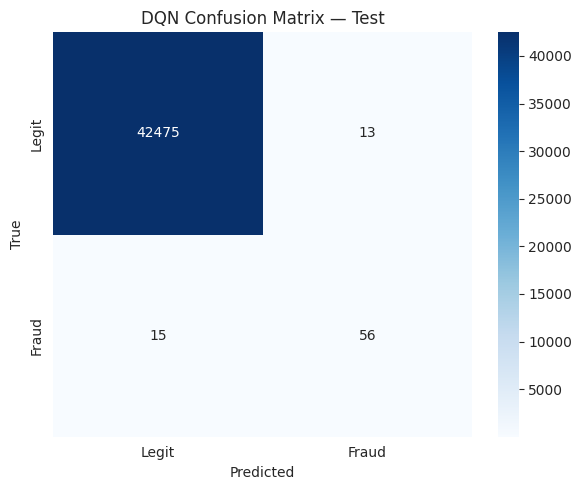

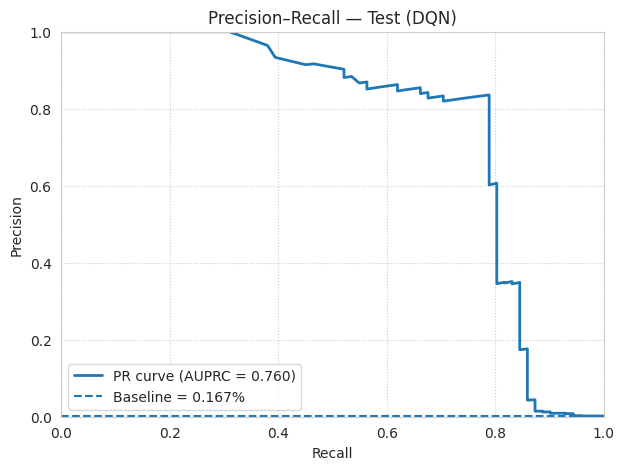

In [ ]:
print(f"Chosen τ (from validation): {tau:.6f}")
eval_split(yt, proba_test, "Test", tau, savepath="pr_curve_dqn_test.png")

## **6.3. Part B, Approach 2: Neural Network Classifier**

### **6.3.1. Building the Neural Network**

In [ ]:
##### train a Neural Network: GAN and NeuralNetwork
for nm in ["X_train_balanced","y_train_balanced","X_val_sc","y_val"]:
    assert nm in globals(), f"Missing {nm}. Run the scaling first."
Xtr = X_train_balanced.values.astype("float32")
ytr = y_train_balanced.astype("int32")
Xv  = X_val_sc.values.astype("float32")
yv  = y_val.values.astype("int32")
##### Define the model - simple, strong MLP
inp = layers.Input(shape=(Xtr.shape[1],))
x   = layers.Dense(256, activation="relu")(inp); x = layers.BatchNormalization()(x); x = layers.Dropout(0.25)(x)
x   = layers.Dense(128, activation="relu")(x);   x = layers.BatchNormalization()(x); x = layers.Dropout(0.20)(x)
x   = layers.Dense(64,  activation="relu")(x)
out = layers.Dense(1, activation="sigmoid")(x)
nn_clf = Model(inp, out, name="GAN_NN")
nn_clf.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",          ##### replace with loss_fn for focal loss
    metrics=[tf.keras.metrics.AUC(curve="PR", name="AUC_PR")]
)
###### Train with early stopping + LR scheduling
bs = int(min(4096, max(256, Xtr.shape[0] // 10)))
es = callbacks.EarlyStopping(monitor="val_AUC_PR", mode="max", patience=8, restore_best_weights=True, verbose=1)
rlr = callbacks.ReduceLROnPlateau(monitor="val_AUC_PR", mode="max", factor=0.5, patience=3, min_lr=1e-5, verbose=1)
history = nn_clf.fit(
    Xtr, ytr,
    validation_data=(Xv, yv),
    epochs=60,
    batch_size=bs,
    callbacks=[es, rlr],
    verbose=1
)
print("NN training complete.")

Epoch 1/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - AUC_PR: 0.9207 - loss: 0.1258 - val_AUC_PR: 0.6945 - val_loss: 0.0349 - learning_rate: 0.0010
Epoch 2/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC_PR: 0.9980 - loss: 0.0044 - val_AUC_PR: 0.7026 - val_loss: 0.0069 - learning_rate: 0.0010
Epoch 3/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC_PR: 0.9986 - loss: 0.0035 - val_AUC_PR: 0.7142 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 4/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC_PR: 0.9988 - loss: 0.0032 - val_AUC_PR: 0.7938 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 5/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC_PR: 0.9990 - loss: 0.0028 - val_AUC_PR: 0.8032 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 6/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC_PR: 0.9988 - loss: 0.0028 - val_AUC_PR: 0.8056 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 7/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC_PR: 0.9989 - loss: 0.0027 - val_AUC_PR: 0.8083 - val_loss: 0.0029 -

### **6.3.2. Training the Neural Network**

In [ ]:
####Evaluate the GAN and NN: threshold from VAL, report test metrics and PR curve
for nm in ["nn_clf","X_val_sc","y_val","X_test_sc","y_test"]:
    assert nm in globals(), f"Missing {nm}."
Xv = X_val_sc.values.astype("float32");  yv = y_val.values.astype(int)
Xt = X_test_sc.values.astype("float32"); yt = y_test.values.astype(int)
##### threshold on validation
proba_val = nn_clf.predict(Xv, verbose=0).ravel()
prec, rec, thr = precision_recall_curve(yv, proba_val)
mask = (prec[:-1] >= 0.85) & (rec[:-1] >= 0.85)
if np.any(mask):
    tau = float(thr[np.where(mask)[0][0]])
else:
    f1  = 2*prec[:-1]*rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)
    tau = float(thr[np.argmax(f1)])

 ### **6.3.3. Evaluating the Novel Hybrid (WGAN-GP+NN) Framework**

Chosen τ (from validation): 0.175425

--- GAN+NN — Test ---
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     42488
     Fraud (1)       0.86      0.76      0.81        71

      accuracy                           1.00     42559
     macro avg       0.93      0.88      0.90     42559
  weighted avg       1.00      1.00      1.00     42559

MCC: 0.8071094942402436
AUPRC: 0.811846299270493


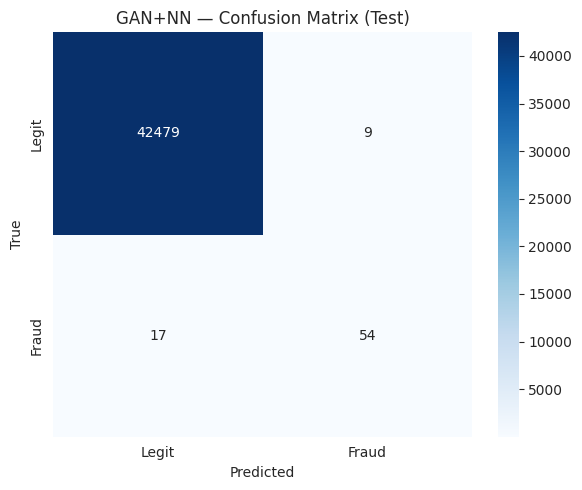

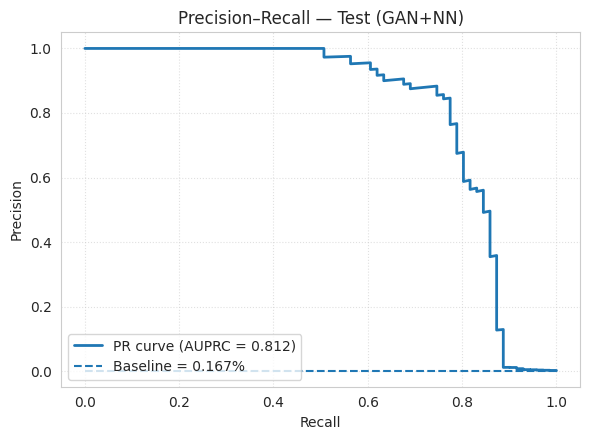

In [ ]:
###### Test metrics
proba_test = nn_clf.predict(Xt, verbose=0).ravel()
yhat_test  = (proba_test > tau).astype(int)
print(f"Chosen τ (from validation): {tau:.6f}")
print("\n--- GAN+NN — Test ---")
print(classification_report(yt, yhat_test, target_names=['Legitimate (0)','Fraud (1)']))
print("MCC:",   matthews_corrcoef(yt, yhat_test))
print("AUPRC:", average_precision_score(yt, proba_test))
##### Confusion matrix
cm = confusion_matrix(yt, yhat_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit','Fraud'], yticklabels=['Legit','Fraud'])
plt.title("GAN+NN — Confusion Matrix (Test)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()
#### Precision–Recall curve on test
prec_t, rec_t, _ = precision_recall_curve(yt, proba_test)
auprc = average_precision_score(yt, proba_test)
plt.figure(figsize=(6,4.5))
plt.plot(rec_t, prec_t, linewidth=2, label=f"PR curve (AUPRC = {auprc:.3f})")
plt.hlines(np.mean(yt), 0, 1, linestyles="dashed", label=f"Baseline = {np.mean(yt)*100:.3f}%")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall — Test (GAN+NN)")
plt.legend(); plt.grid(True, ls=":", alpha=0.6); plt.tight_layout(); plt.show()

In [ ]:
######Actor-Critic model: policy logits and value for PPO
tf.keras.utils.set_random_seed(42)
class ActorCritic(Model):
    def __init__(self, input_dim, hidden=[256, 128, 64]):
        super().__init__()
        self.d1 = layers.Dense(hidden[0], activation="relu")
        self.bn1 = layers.BatchNormalization()
        self.d2 = layers.Dense(hidden[1], activation="relu")
        self.bn2 = layers.BatchNormalization()
        self.d3 = layers.Dense(hidden[2], activation="relu")
        #### policy: logits for 2 actions: 0=legit, 1=fraud; value: scalar
        self.pi = layers.Dense(2)     ## logits
        self.v  = layers.Dense(1)     # ##state value
        ###### build once
        _ = self.call(tf.zeros([1, input_dim], dtype=tf.float32), training=False)
    def call(self, x, training=False):
        x = self.d1(x); x = self.bn1(x, training=training)
        x = self.d2(x); x = self.bn2(x, training=training)
        x = self.d3(x)
        logits = self.pi(x)
        value  = self.v(x)
        return logits, tf.squeeze(value, axis=-1)
def log_softmax(logits):
    ####stable log-softmax
    return logits - tf.reduce_logsumexp(logits, axis=1, keepdims=True)
def cat_log_prob(logits, actions):
    ###actions shape: [B] ints {0,1}
    lsm = log_softmax(logits)
    idx = tf.stack([tf.range(tf.shape(actions)[0]), actions], axis=1)
    return tf.gather_nd(lsm, idx)
def cat_entropy(logits):
    probs = tf.nn.softmax(logits, axis=1)
    return -tf.reduce_sum(probs * tf.math.log(tf.clip_by_value(probs,1e-8,1.0)), axis=1)

In [ ]:
#####Build tf.data dataset and define rewards
for nm in ["X_train_balanced","y_train_balanced","X_val_sc","y_val","X_test_sc","y_test"]:
    assert nm in globals(), f"Missing {nm}. Runs earlier code"
Xtr = X_train_balanced.values.astype("float32")
ytr = y_train_balanced.astype("int32")
Xv = X_val_sc.values.astype("float32"); yv = y_val.values.astype("int32")
Xt = X_test_sc.values.astype("float32"); yt = y_test.values.astype("int32")
###Single-step reward shaping
def reward_for(pred, true):
    ##### TP: +3, TN: +1, FP: −7, FN: −12, heavier penalty for FN
    if pred==1 and true==1:  return  3.0
    if pred==0 and true==0:  return  1.0
    if pred==1 and true==0:  return -7.0
    if pred==0 and true==1:  return -12.0
    return 0.0
BATCH_ROLLOUT = 4096   ####how many samples collectxd per on-policy rollout
PPO_EPOCHS    = 4      ### gradient epochs per rollout
MINIBATCH     = 512    # ###SGD minibatch size inside PPO
CLIP_EPS      = 0.20
ENT_COEF      = 0.001
VF_COEF       = 0.5
LR            = 3e-4
ROLLOUTS      = 20     #### total   on-policy iterations, increase to train longer
ppo = ActorCritic(input_dim=Xtr.shape[1])
optimizer = tf.keras.optimizers.Adam(LR)

In [ ]:
#####Train PPO (single-step episodes suitable for static classification)
import math, tensorflow as tf
def collect_rollout(X, y, batch_size):
    # #####sample a random subset: on-policy
    idx = np.random.choice(len(X), size=batch_size, replace=False)
    s   = X[idx]
    t   = y[idx]
    ##### forward pass
    logits, values = ppo(tf.convert_to_tensor(s), training=False)   ####[B,2], [B]
    ##### sample actions from policy
    a = tf.random.categorical(logits, num_samples=1)[:,0]           ######[B]
    a = tf.cast(a, tf.int32)
    ### rewards from labels
    r = np.array([reward_for(int(ai), int(ti)) for ai,ti in zip(a.numpy(), t)], dtype=np.float32)
    ### old log probs for taken actions (used in clipping)
    old_logp = cat_log_prob(logits, a)
    ## for single-step, return = reward; advantage = rewrdss − V (s)
    returns   = tf.convert_to_tensor(r, dtype=tf.float32)
    advantages= returns - values
    return s.astype("float32"), t, a.numpy(), old_logp.numpy(), returns.numpy(), advantages.numpy()
def ppo_update(states, actions, old_logp, returns, advantages):
    ds = tf.data.Dataset.from_tensor_slices((states, actions, old_logp, returns, advantages))\
                        .shuffle(len(states)).batch(MINIBATCH)
    for _ in range(PPO_EPOCHS):
        for s, a, olp, ret, adv in ds:
            with tf.GradientTape() as tape:
                logits, values = ppo(s, training=True)
                new_logp = cat_log_prob(logits, tf.cast(a, tf.int32))
                ratio    = tf.exp(new_logp - olp)
                adv = tf.stop_gradient(adv)
                unclipped = ratio * adv
                clipped   = tf.clip_by_value(ratio, 1.0-CLIP_EPS, 1.0+CLIP_EPS) * adv
                policy_loss = -tf.reduce_mean(tf.minimum(unclipped, clipped))
                value_loss  = tf.reduce_mean(tf.square(ret - values)) * VF_COEF
                entropy     = tf.reduce_mean(cat_entropy(logits)) * ENT_COEF
                loss = policy_loss + value_loss - entropy
            grads = tape.gradient(loss, ppo.trainable_variables)
            optimizer.apply_gradients(zip(grads, ppo.trainable_variables))
# #####training
for it in range(1, ROLLOUTS+1):
    s, t, a, olp, ret, adv = collect_rollout(Xtr, ytr, BATCH_ROLLOUT)
    ppo_update(s, a, olp, ret, adv)
    if it % 5 == 0:
        print(f"PPO rollout {it}/{ROLLOUTS} done.")
print("PPO training complete.")

PPO rollout 5/20 done.
PPO rollout 10/20 done.
PPO rollout 15/20 done.
PPO rollout 20/20 done.
PPO training complete.


Chosen τ (from validation): 0.228643

--- GAN + PPO — Test ---
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     42488
     Fraud (1)       0.76      0.77      0.77        71

      accuracy                           1.00     42559
     macro avg       0.88      0.89      0.88     42559
  weighted avg       1.00      1.00      1.00     42559

MCC: 0.7688613017782847
AUPRC: 0.6669384939772414


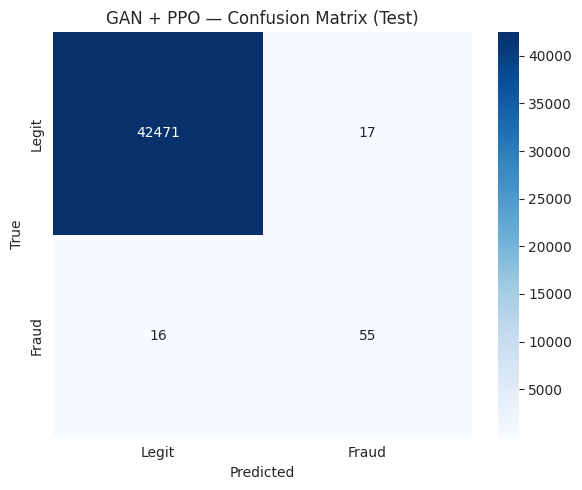

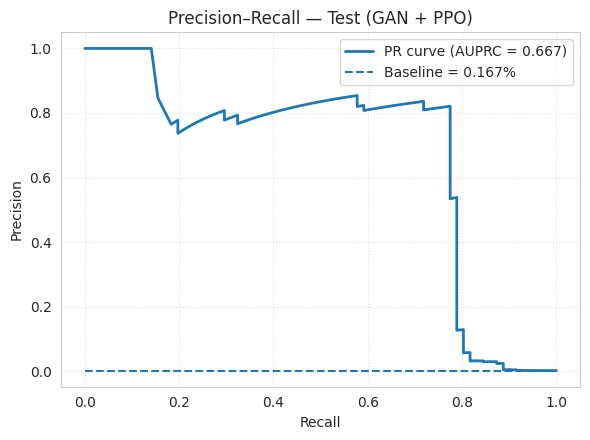

In [ ]:
####Evaluate PPO policy: choose on validatio, report test metrics and PR curve
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import precision_recall_curve, classification_report, matthews_corrcoef, average_precision_score, confusion_matrix
def policy_proba(X, batch=4096):
    probs, n = [], X.shape[0]
    for i in range(0, n, batch):
        logits, _ = ppo(tf.convert_to_tensor(X[i:i+batch]), training=False)
        pr = tf.nn.softmax(logits, axis=1).numpy()[:,1]  # P(class=1)
        probs.append(pr)
    return np.concatenate(probs, axis=0)
#####pick threshold on validtion
p_val = policy_proba(Xv)
prec, rec, thr = precision_recall_curve(yv, p_val)
mask = (prec[:-1] >= 0.85) & (rec[:-1] >= 0.85)
if np.any(mask):
    tau = float(thr[np.where(mask)[0][0]])
else:
    f1  = 2*prec[:-1]*rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)
    tau = float(thr[np.argmax(f1)])
######test reporting
p_test = policy_proba(Xt)
yhat   = (p_test > tau).astype(int)
print(f"Chosen τ (from validation): {tau:.6f}")
print("\n--- GAN + PPO — Test ---")
print(classification_report(yt, yhat, target_names=['Legitimate (0)','Fraud (1)']))
print("MCC:",   matthews_corrcoef(yt, yhat))
print("AUPRC:", average_precision_score(yt, p_test))
cm = confusion_matrix(yt, yhat)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit','Fraud'], yticklabels=['Legit','Fraud'])
plt.title("GAN + PPO — Confusion Matrix (Test)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.tight_layout(); plt.show()
######PR curve
prec_t, rec_t, _ = precision_recall_curve(yt, p_test)
auprc = average_precision_score(yt, p_test)
plt.figure(figsize=(6,4.5))
plt.plot(rec_t, prec_t, linewidth=2, label=f"PR curve (AUPRC = {auprc:.3f})")
plt.hlines(np.mean(yt), 0, 1, linestyles="dashed", label=f"Baseline = {np.mean(yt)*100:.3f}%")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall — Test (GAN + PPO)")
plt.legend(); plt.grid(True, ls=":", alpha=0.6); plt.tight_layout(); plt.show()

In [ ]:
#####Final Model Comparison - Test Set: fraud-class metrics with clear highlighting
rows = [
    ### MOdel matrix
    {"Model": "Optimised XGBoost",          "AUPRC": 0.8238, "F1": 0.85, "MCC": 0.8496, "Precision": 0.93, "Recall": 0.77},
    {"Model": "WGAN-GP + NN",               "AUPRC": 0.811846299270493, "F1": 0.81, "MCC": 0.8071094942402436, "Precision": 0.86, "Recall": 0.76},
    {"Model": "DQN (DDQN)",                 "AUPRC": 0.7601081280479591, "F1": 0.80, "MCC": 0.7997524509536801, "Precision": 0.81, "Recall": 0.79},
    {"Model": "WGAN-GP + PPO",              "AUPRC": 0.6669384939772414, "F1": 0.77, "MCC": 0.7688613017782847, "Precision": 0.76, "Recall": 0.77},
    {"Model": "Optimised Isolation Forest", "AUPRC": 0.2147,             "F1": 0.16, "MCC": 0.2339,             "Precision": 0.09, "Recall": 0.61},
]
df = pd.DataFrame(rows).sort_values("AUPRC", ascending=False, ignore_index=True)
######helpers for styling
def highlight_max(col, bg="#a7f0ba"):
    s = pd.Series([""] * len(col), index=col.index)
    s[col == col.max()] = f"background-color: {bg}; color: #111; font-weight: 700;"
    return s
def zebra_rows(x, even="#2b2b2b", odd="#242424", text="#e8e8e8"):
    styles = []
    for i in range(len(x)):
        bg = even if i % 2 == 0 else odd
        styles.append([f"background-color: {bg}; color: {text};"] * x.shape[1])
    return pd.DataFrame(styles, columns=x.columns, index=x.index)
sty = (df.style
       .format({"AUPRC":"{:.3f}","F1":"{:.3f}","MCC":"{:.3f}","Precision":"{:.2f}","Recall":"{:.2f}"})
       .set_caption("Final Model Comparison — Test Set (Fraud-Class Metrics)")
       .apply(zebra_rows, axis=None)
       .set_properties(**{"border-color":"#3a3a3a","border-width":"1px","border-style":"solid"})
      )
for col in ["AUPRC","F1","MCC","Precision","Recall"]:
    sty = sty.apply(highlight_max, subset=[col])
###### Hide index - works across pandas versions
try:
    sty = sty.hide(axis="index")
except Exception:
    sty = sty.hide_index()
display(sty)
#### Save a clean CSV too
df.to_csv("model_comparison_testset.csv", index=False)
print("model_comparison_testset")

Model,AUPRC,F1,MCC,Precision,Recall
Optimised XGBoost,0.824,0.850,0.850,0.93,0.77
WGAN-GP + NN,0.812,0.810,0.807,0.86,0.76
DQN (DDQN),0.760,0.800,0.800,0.81,0.79
WGAN-GP + PPO,0.667,0.770,0.769,0.76,0.77
Optimised Isolation Forest,0.215,0.160,0.234,0.09,0.61


Saved: model_comparison_testset.csv
